## load dataset


In [ ]:
!pip install pytdc
!pip install pandas

In [2]:
import pandas as pd

data = pd.read_csv("Lipophilicity.csv")
data.head()


,CMPD_CHEMBLID,exp,smiles
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl
3,CHEMBL234951,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...
4,CHEMBL565079,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...


## extract the features from smiles

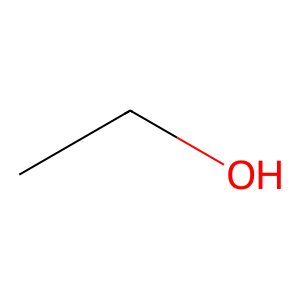

In [6]:
from rdkit import Chem
from rdkit.Chem import Draw,Descriptors,rdmolops
from IPython.display import display
smiles=input("enter a smiles string pls")
mol=Chem.MolFromSmiles(smiles)
# Show molecular info
def featurize(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return [
        Descriptors.MolWt(mol),
        Descriptors.NumHDonors(mol),
        Descriptors.NumHAcceptors(mol),
        Descriptors.MolLogP(mol),
        Descriptors.TPSA(mol)
    ]




display(Draw.MolToImage(mol))

## build the dataset

In [28]:
X = []
y = []

for i, row in data.iterrows():
    feats = featurize(row["smiles"])
    if feats is not None:
        X.append(feats)
        y.append(1 if row["exp"] >1 else 0)  # or 'target' depending on dataset


In [29]:
print("First row of X:", X[0])
print("First label y:", y[0])
print("Total X:", len(X), "| Total y:", len(y))


First row of X: [340.85800000000006, 0, 4, 3.5489000000000024, 24.3]
First label y: 1
Total X: 4200 | Total y: 4200


## spliting dataset so that we can train and test


In [ ]:
!pip install scikit-learn


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## model preparation


In [32]:
!pip install numpy

In [33]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()




In [34]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## FINAL RESULT

## model testing with decision tree-0.80

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(" Accuracy:\n", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy:
 0.8047619047619048

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.44      0.46       158
           1       0.87      0.89      0.88       682

    accuracy                           0.80       840
   macro avg       0.68      0.66      0.67       840
weighted avg       0.80      0.80      0.80       840


🔢 Confusion Matrix:
 [[ 69  89]
 [ 75 607]]


In [ ]:
!pip install pandas

In [53]:
import pandas as pd
pd.set_option("display.width", 1000)
pd.set_option("display.max_columns", None)


In [54]:
import pandas as pd

# 1. Create a DataFrame from X_test (test features)
X_test_df = pd.DataFrame(
    X_test,
    columns=["MolWt", "HDonors", "HAcceptors", "LogP", "TPSA"]
)

# 2. Add true labels and predicted labels
X_test_df["True Label"] = y_test
X_test_df["Predicted"] = y_pred
# 3. Add a column to check if prediction is correct
X_test_df["Correct?"] = X_test_df["True Label"] == X_test_df["Predicted"]
print(X_test_df.head(10))



     MolWt  HDonors  HAcceptors     LogP    TPSA  True Label  Predicted  Correct?
0  366.804      1.0         3.0  4.11690   62.55           1          0     False
1  341.451      2.0         4.0  3.24140   58.56           1          1      True
2  492.428      3.0         5.0  5.09260   91.32           0          1     False
3  281.381      1.0         5.0  1.29180   54.46           1          1      True
4  386.779      3.0         4.0  2.05610   95.50           1          1      True
5  514.629      1.0         5.0  7.26442   72.94           1          1      True
6  458.400      3.0         6.0  3.66580  125.79           0          0      True
7  359.794      2.0         5.0  2.29450   87.72           1          1      True
8  145.165      1.0         3.0  1.21200   51.80           1          1      True
9  253.240      1.0         5.0  1.98928   80.00           1          1      True


## accuracy testing by svm-0.81

In [55]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(" Accuracy:\n", accuracy_score(y_test, y_pred))

 Accuracy:
 0.8119047619047619
